In [1]:
include("../hlt/halite.jl")
include("../salboai/salboai.jl")
using Plots

newship(y,x,h) = H.Ship(0, 1, CartesianIndex(y,x), h)

## Initialize some map:

halite_map_str = """
    1 17 3 12 37 86 21 35 5 160 439 101 9 166 116 150 150 116 166 9 101 439 160 5 35 21 86 37 12 3 17 1
    37 30 17 12 110 31 154 168 10 214 214 82 60 30 29 12 12 29 30 60 82 214 214 10 168 154 31 110 12 17 30 37
    9 16 8 38 15 126 147 201 29 22 22 79 274 79 13 88 88 13 79 274 79 22 22 29 201 147 126 15 38 8 16 9
    27 35 268 39 260 66 115 66 104 43 135 168 409 212 85 23 23 85 212 409 168 135 43 104 66 115 66 260 39 268 35 27
    71 229 339 91 113 151 602 180 96 71 77 139 425 270 70 58 58 70 270 425 139 77 71 96 180 602 151 113 91 339 229 71
    111 298 112 119 95 472 217 138 136 261 63 448 174 102 47 31 31 47 102 174 448 63 261 136 138 217 472 95 119 112 298 111
    24 52 287 324 92 376 700 105 22 54 98 333 254 130 30 54 54 30 130 254 333 98 54 22 105 700 376 92 324 287 52 24
    149 147 134 230 264 252 275 476 271 45 92 279 193 120 64 17 17 64 120 193 279 92 45 271 476 275 252 264 230 134 147 149
    0 37 245 308 876 330 636 220 47 242 111 272 489 139 125 16 16 125 139 489 272 111 242 47 220 636 330 876 308 245 37 0
    129 56 312 497 474 296 116 385 306 71 140 267 273 154 75 192 192 75 154 273 267 140 71 306 385 116 296 474 497 312 56 129
    45 27 53 70 234 66 31 69 122 102 105 147 491 176 124 212 212 124 176 491 147 105 102 122 69 31 66 234 70 53 27 45
    21 34 107 106 140 270 45 174 78 67 237 239 358 351 487 53 53 487 351 358 239 237 67 78 174 45 270 140 106 107 34 21
    7 49 492 240 4 42 27 68 4 98 661 503 701 657 450 212 212 450 657 701 503 661 98 4 68 27 42 4 240 492 49 7
    26 70 281 56 46 34 23 26 43 205 170 352 524 386 169 89 89 169 386 524 352 170 205 43 26 23 34 46 56 281 70 26
    57 150 73 259 155 98 13 249 246 171 232 165 229 187 90 141 141 90 187 229 165 232 171 246 249 13 98 155 259 73 150 57
    329 241 87 129 419 104 29 21 24 55 137 281 324 294 202 139 139 202 294 324 281 137 55 24 21 29 104 419 129 87 241 329
    213 162 185 205 515 289 57 89 0 20 93 647 988 382 508 229 229 508 382 988 647 93 20 0 89 57 289 515 205 185 162 213
    465 143 148 302 454 80 271 14 36 20 62 161 387 221 458 200 200 458 221 387 161 62 20 36 14 271 80 454 302 148 143 465
    340 434 210 197 85 135 22 17 6 36 34 142 217 108 95 277 277 95 108 217 142 34 36 6 17 22 135 85 197 210 434 340
    186 197 391 201 55 187 168 162 11 135 76 136 133 83 296 140 140 296 83 133 136 76 135 11 162 168 187 55 201 391 197 186
    299 234 106 93 46 145 335 135 11 221 478 68 19 31 54 148 148 54 31 19 68 478 221 11 135 335 145 46 93 106 234 299
    363 94 58 71 100 258 237 84 186 127 105 126 96 90 46 95 95 46 90 96 126 105 127 186 84 237 258 100 71 58 94 363
    28 104 37 60 158 219 352 309 50 63 133 389 684 265 48 111 111 48 265 684 389 133 63 50 309 352 219 158 60 37 104 28
    32 123 80 209 142 149 217 242 145 347 94 158 212 132 394 172 172 394 132 212 158 94 347 145 242 217 149 142 209 80 123 32
    7 129 192 138 211 158 257 393 311 152 158 218 153 132 442 119 119 442 132 153 218 158 152 311 393 257 158 211 138 192 129 7
    141 43 85 396 140 245 93 109 383 135 232 121 101 193 189 86 86 189 193 101 121 232 135 383 109 93 245 140 396 85 43 141
    262 209 34 167 444 372 44 57 105 211 285 259 258 132 381 198 198 381 132 258 259 285 211 105 57 44 372 444 167 34 209 262
    405 165 59 81 227 112 276 113 72 287 81 84 158 272 312 231 231 312 272 158 84 81 287 72 113 276 112 227 81 59 165 405
    302 180 126 42 12 76 496 61 14 25 84 107 45 131 416 210 210 416 131 45 107 84 25 14 61 496 76 12 42 126 180 302
    122 145 50 37 28 122 173 83 26 151 218 57 94 323 183 165 165 183 323 94 57 218 151 26 83 173 122 28 37 50 145 122
    315 182 34 62 177 90 422 72 7 8 8 130 27 191 214 88 88 214 191 27 130 8 8 7 72 422 90 177 62 34 182 315
    34 166 30 27 232 213 241 50 98 91 43 113 12 27 293 205 205 293 27 12 113 43 91 98 50 241 213 232 27 30 166 34"""

halite_map_strs = split(halite_map_str, '\n')
m = H.parse_map(halite_map_strs)

s1 = newship(2,2, 0)
s2 = newship(2,3, 0)
s3 = newship(4,1, 0)
newship(4,2, 0)
newship(4,3, 0)
newship(4,4, 0)
ships = [s1,s2,s3]
me = H.Player(
        0,
       CartesianIndex(16,24),
        1234,
        ships,
        H.DropOff[])
g = H.GameMap(0, H.WrappedArray(m), Dict(0=>me))

turn=1
S=Salboai.GameState()
Salboai.update_game_state!(S, g, turn);

In [2]:
diamondkernel(T, r) = T[abs(x) + abs(y) ≤ r for y in -r:r, x in -r:r]

function pyramidkernel(T, r)
    ksize = Int(2*r+1)
    k = zeros(Int, (ksize,ksize))
    c = r+1
    k[c,c]=1
    for i=1:r
        k[c-i:c+i,c-i:c+i] += diamondkernel(Int, i);
    end
    return k
end

function pyramidfilter_slow(m, r)
    k = pyramidkernel(Int, r);

    pyramidsum=zeros(Int, size(m))
   for x=1:size(m,2), y=1:size(m,1)
       pyramidsum[y,x] = sum(m[y-r:y+r, x-r:x+r] .* k)
   end
   return pyramidsum
end

function pyramidpart(M, p, r)
    k = pyramidkernel(Int, r)
    m = H.WrappedMatrix(M)
    a = H.WrappedMatrix(zeros(Int, size(m)))
    a[p[1]-r:p[1]+r, p[2]-r:p[2]+r] .= k.* (m[p[1]-r:p[1]+r, p[2]-r:p[2]+r])
    return a
end

localmaxima2(A) = findall((A .> circshift(A, (1,0))) .&
                          (A .> circshift(A, (0,1))) .&
                          (A .≥ circshift(A, (-1,0))) .&
                          (A .≥ circshift(A, (0,-1))))

function dropoffmap(M, p_dropoffs, r, dropoffweight)
    pyramidsum = pyramidfilter_slow(M, r)
    for p in p_dropoffs
        pyramidsum -= dropoffweight * pyramidpart(M, p, r)
    end
    return H.WrappedMatrix(pyramidsum)
end

function dropoffcands(pyramidsum)
    w = H.WrappedMatrix(pyramidsum)
    cands = CartesianIndex{2}[]
    for lm in localmaxima2(w.a)
        if w.a[lm] == 0 continue end
        push!(cands, lm)
    end
    return cands
end

dropoffcands (generic function with 1 method)

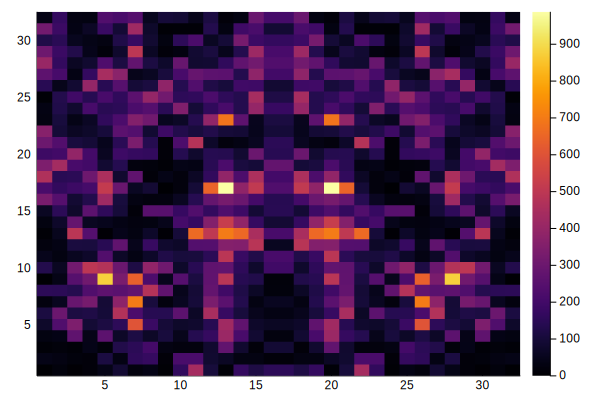

In [4]:
heatmap(g.halite)

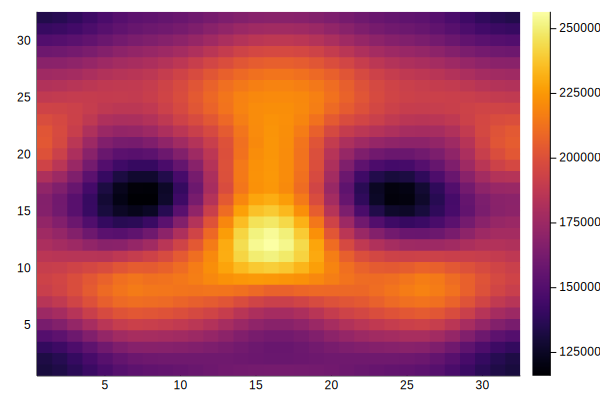

In [29]:
p_dropoffs = [CartesianIndex(16,24), CartesianIndex(16,8)]
#p_dropoffs = [me.shipyard]
r=7
h1 = dropoffmap(g.halite, p_dropoffs, r, 50) #pyramid filter on map minus pyramid on dropoffs
h2 = pyramidfilter_slow(h1, r) #smooth again with pyramid
heatmap(h2)

In [30]:
localmaxima2(h2)

7-element Array{CartesianIndex{2},1}:
 CartesianIndex(25, 6) 
 CartesianIndex(8, 7)  
 CartesianIndex(12, 16)
 CartesianIndex(18, 16)
 CartesianIndex(8, 26) 
 CartesianIndex(25, 27)
 CartesianIndex(21, 32)